In [1]:
import random
import math
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def GRVG(p):
    """Generate a Geometric Random Variable Generator with parameter p."""
    i = 1
    while True:
        if random.random() < p:
            return i
        i += 1

In [3]:
def GRVG_invese(p):
    """Generate a Geometric Random Variable Generator using Inverse Transform Sampling."""
    u = random.random()
    i = 1
    mass = p          # P(X=1)
    cdf = mass
    while u > cdf:
        mass *= (1 - p)
        cdf += mass
        i += 1
    return i

In [4]:
def GRVG_log(p):
    """Generate a Geometric Random Variable Generator using LOG computation."""
    u = random.random()
    return int((math.log(1 - u) / math.log(1 - p))) + 1

In [5]:
def sampling_time(generator,p,N):
    """Calculate the time to generate N samples using the specified generator function."""
    t0 = time.perf_counter()
    X = [generator(p) for _ in range(N)]
    t1= time.perf_counter()
    return t1 - t0,X

In [21]:
N = 500
P = .3
t1, X1 = sampling_time(GRVG,P,N)
t2, X2 = sampling_time(GRVG_invese,P,N)
t3, X3 = sampling_time(GRVG_log,P,N)

summary = f"""Sampling {N} Geometric Random Variables with p={P}
Using GRVG: {t1:.6f} seconds
Using GRVG_inverse: {t2:.6f} seconds
Using GRVG_log: {t3:.6f} seconds"""
print(summary)

Sampling 500 Geometric Random Variables with p=0.3
Using GRVG: 0.000100 seconds
Using GRVG_inverse: 0.000133 seconds
Using GRVG_log: 0.000140 seconds


In [23]:
import scipy.stats as stats

C:\Users\Wayne\AppData\Local\Temp\ipykernel_24764\2433082407.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


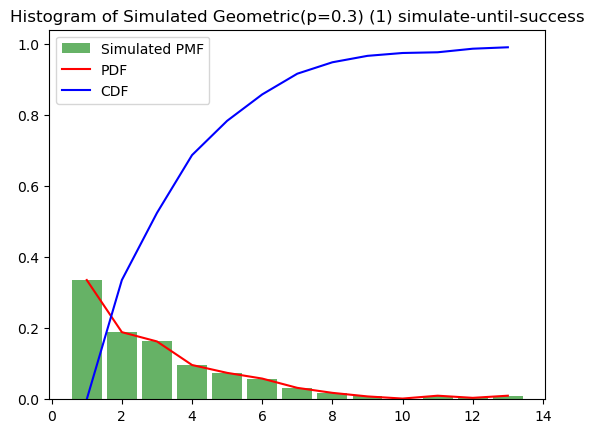

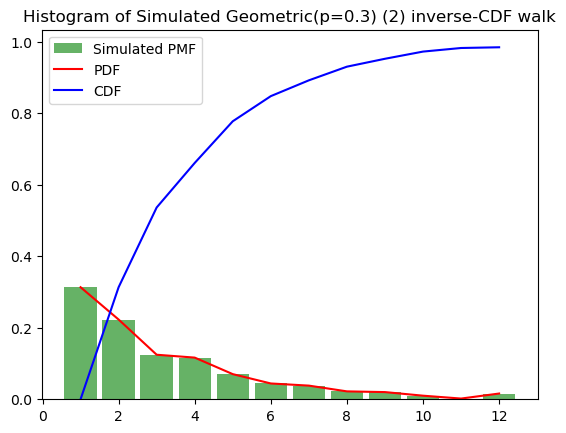

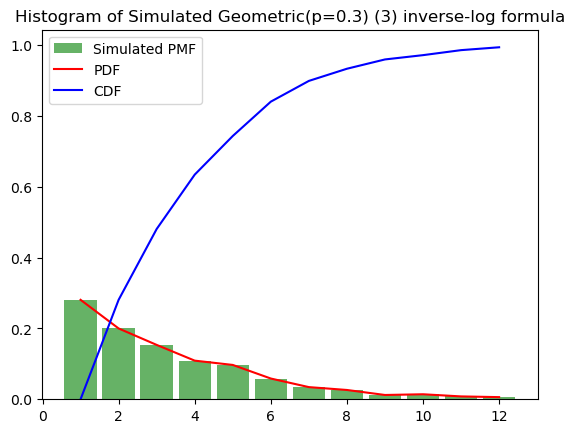

In [25]:
def plot_hist(xs, p, title_suffix):
    # choose a reasonable right cut to display (e.g., 99th percentile)
    right = int(np.quantile(xs, 0.99))
    bins = np.arange(1, right + 2)  # left-aligned integer bins
    hist = np.histogram(xs, density=False, bins=bins)
    hist_dist = stats.rv_histogram(hist, density=False)
    fig, ax = plt.subplots()
    ax.set_title(f"Histogram of Simulated Geometric(p={p}) {title_suffix}")
    ax.hist(xs, bins=bins, align="left", density=True, rwidth=0.85, alpha=0.6, color='g', label='Simulated PMF')
    ax.plot(bins[:-1], hist_dist.pdf(bins[:-1]), 'r', label='PDF')
    ax.plot(bins[:-1], hist_dist.cdf(bins[:-1]), 'b-', label='CDF')
    ax.legend()
    fig.show()

plot_hist(X1, P, "(1) simulate-until-success")
plot_hist(X2, P, "(2) inverse-CDF walk")
plot_hist(X3, P, "(3) inverse-log formula")